In [1]:
import pdfplumber
import pandas as pd
import string
from IPython.display import display
from tabulate import tabulate
import os
from openpyxl import load_workbook
from openpyxl.styles.alignment import Alignment
from openpyxl.styles import Alignment
import openpyxl

In [2]:
# os.chdir("E:\\nadupallisriniv\\")

In [3]:
os.getcwd()

'C:\\Users\\aakas\\Aakash Nadupalli ipynb files\\PDF_PLUMBER'

In [6]:
pdf = pdfplumber.open("E:\pagepvtltd_2017\GSTR-3B_PDFs\GSTR3B_36AACCP0932H2ZM_102021.pdf")
pdf.pages

[<Page:1>, <Page:2>]

In [9]:
first_page = pdf.pages[0]
second_page = pdf.pages[1]

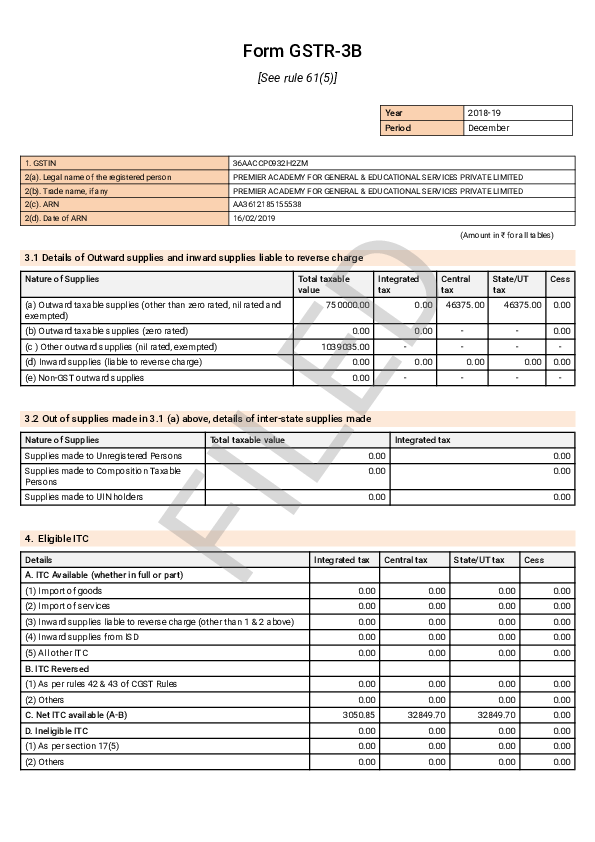

In [154]:
first_page.to_image()

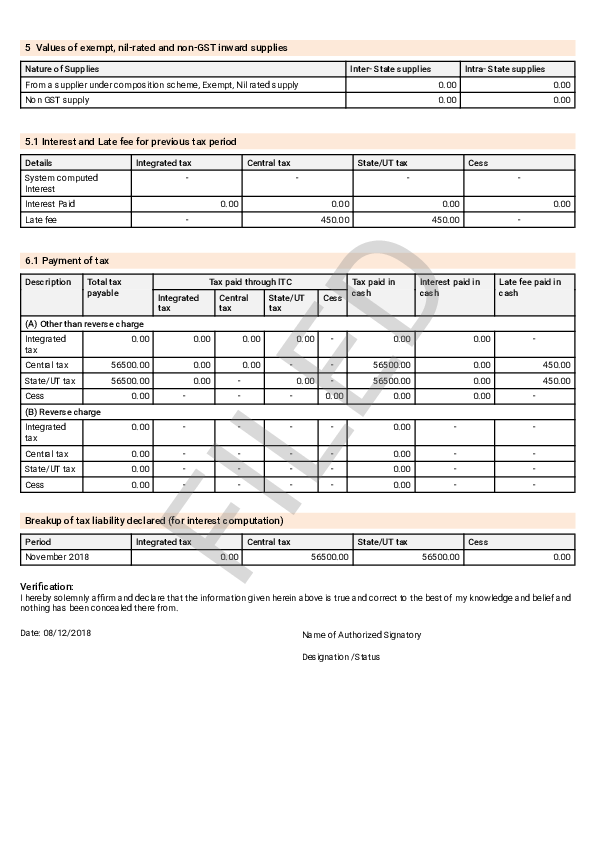

In [34]:
second_page.to_image()

In [10]:
All_Tables = first_page.extract_tables()
replacers = {}
for i in string.ascii_letters:
    replacers[f'{i}\n'] =''
replacers.update({"\n":"",None:" "})

YearandPeriod = {}
for i in range(len(All_Tables[0])):
    YearandPeriod[All_Tables[0][i][0]] = [All_Tables[0][i][1]]

GSTIN = {}
for i in range(len(All_Tables[1])):
    GSTIN[All_Tables[1][i][0]] = [All_Tables[1][i][1]]

Details3_1 = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables[2][0]])
for i in range(len(All_Tables[2][1:])):
    Details3_1.loc[i] = All_Tables[2][1:][i]
Details3_1 = Details3_1.replace(replacers,regex=True)

Details3_2 = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables[3][0]])
for i in range(len(All_Tables[3][1:])):
    Details3_2.loc[i] = All_Tables[3][1:][i]
Details3_2 = Details3_2.replace(replacers,regex=True)

EligibleITC = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables[4][0]])
for i in range(len(All_Tables[4][1:])):
    EligibleITC.loc[i] = All_Tables[4][1:][i]
EligibleITC = EligibleITC.replace(replacers,regex=True)
print("       ")
print("                                                      First Page ")
display(pd.DataFrame(YearandPeriod),pd.DataFrame(GSTIN).transpose(),Details3_1,Details3_2,EligibleITC)

       
                                                      First Page 


,Year,Period
0,2021-22,October


,0
1. GSTIN,36AACCP0932H2ZM
2(a). Legal name of the registered person,PREMIER ACADEMY FOR GENERAL & EDUCATIONAL SERV...
"2(b). Trade name, if any",PREMIER ACADEMY FOR GENERAL & EDUCATIONAL SERV...
2(c). ARN,AA361021598972Y
2(d). Date of ARN,21/01/2022


,Nature of Supplies,Total taxable value,D Integrated tax,Central tax,State/UT tax,Cess
0,(a) Outward taxable supplies (other than zero ...,856065.00,0.00,54760.14,54760.14,0.00
1,(b) Outward taxable supplies (zero rated),0.00,0.00,-,-,0.00
2,"(c ) Other outward supplies (nil rated, exempted)",300000.00,-,-,-,-
3,(d) Inward supplies (liable to reverse charge),0.00,0.00,0.00,0.00,0.00
4,(e) Non-GST outward supplies,0.00,-,-,-,-


,Nature of Supplies,L Total taxable value,Integrated tax
0,Supplies made to Unregistered Persons,0.00,0.00
1,Supplies made to Composition Taxable Persons,0.00,0.00
2,Supplies made to UIN holders,0.00,0.00


,Details,Integrated tax,Central tax,State/UT tax,Cess
0,A. ITC Available (whether in full or part),,,,
1,(1) Import of goods,0.00,0.00,0.00,0.00
2,(2) Import of services,0.00,0.00,0.00,0.00
3,(3) Inward supplies liable to reverse charge (...,0.00,0.00,0.00,0.00
4,(4) Inward supplies from ISD,0.00,0.00,0.00,0.00
5,(5) All other ITC,247.68,2972.46,2972.46,0.00
6,B. ITC Reversed,,,,
7,(1) As per rules 42 & 43 of CGST Rules,0.00,0.00,0.00,0.00
8,(2) Others,0.00,0.00,0.00,0.00
9,C. Net ITC available (A-B),247.68,2972.46,2972.46,0.00


In [60]:
float(list(Details3_1['Total taxable  value'])[0]) + float(list(Details3_1['Total taxable  value'])[2])

2342643.0

In [157]:
Outward_Inward_Supply = {}
Outward_Inward_Supply.setdefault('3a_Outward_Inward_Supply', {})
for sales in range(len(Details3_1.columns[1:-1])):
    if sales==0:
        ttv = list(Details3_1['Total taxable  value'])
        Outward_Inward_Supply['3a_Outward_Inward_Supply'][Details3_1.columns[1:-1][sales]] = float(float(ttv[0])+float(ttv[2]))
    else:
        Outward_Inward_Supply['3a_Outward_Inward_Supply'][Details3_1.columns[1:-1][sales]] = float(Details3_1[Details3_1.columns[1:-1][sales]][0])
Outward_Inward_Supply

{'3a_Outward_Inward_Supply': {'Total taxable  value': 1789035.0,
  'D Integrated  tax': 0.0,
  'Central  tax': 46375.0,
  'State/UT  tax': 46375.0}}

In [158]:
E_ITC = {}
E_ITC.setdefault('Eligible_ITC', {})
for purch in range(len(EligibleITC.columns[1:4])):
    E_ITC['Eligible_ITC'][EligibleITC.columns[1:4][purch]] = list(EligibleITC.iloc[[5]].transpose()[5])[1:-1][purch]
E_ITC
# EligibleITC[EligibleITC.columns[1:4][0]]
# list(EligibleITC.iloc[[5]].transpose()[5])[1:-1]

{'Eligible_ITC': {'Integrated tax': '0.00',
  'Central tax': '0.00',
  'State/UT tax': '0.00'}}

In [26]:
float(list(LateFee_Interest.iloc[2])[2:-1][0])+float(list(LateFee_Interest.iloc[2])[2:-1][1])

50.0

In [28]:
LI = {}
LI.setdefault('Late_Fee', {})
for li in ['Late_Fee']:
    LI['Late_Fee'][li] = float(list(LateFee_Interest.iloc[2])[2:-1][0])+float(list(LateFee_Interest.iloc[2])[2:-1][1])
LI

{'Late_Fee': {'Late_Fee': 50.0}}

In [35]:
Intr = {}
Intr.setdefault('Interest', {})
for li in ['Interest']:
    Intr['Interest'][li] = float(list(LateFee_Interest.iloc[1])[2:-1][0])+float(list(LateFee_Interest.iloc[1])[2:-1][1])
Intr

{'Interest': {'Interest': 3160.0}}

In [159]:
# LI = {}
# LI.setdefault('Late_Fee', {})
# for li in range(len(LateFee_Interest.columns[1:-1])):
#     LI['Late_Fee'][LateFee_Interest.columns[1:-1][li]] = list(LateFee_Interest.iloc[2])[1:-1][li]
# LI

{'Late_Fee': {'Integrated tax': '-',
  'Central tax': '0.00',
  'State/UT tax': '0.00'}}

In [160]:
Intr = {}
Intr.setdefault('Interest', {})
for li in range(len(LateFee_Interest.columns[1:-1])):
    Intr['Interest'][LateFee_Interest.columns[1:-1][li]] = list(LateFee_Interest.iloc[1])[1:-1][li]
Intr

{'Interest': {'Integrated tax': '0.00',
  'Central tax': '1392.00',
  'State/UT tax': '1392.00'}}

In [161]:
POT = {}
POT.setdefault("PaymentOfTax",{})
for pot in range(len(list(PaymentOfTax.iloc[1:4,0]))):
    POT["PaymentOfTax"][list(PaymentOfTax.iloc[1:4,0])[pot]] = list(PaymentOfTax.iloc[1:4,6])[pot]
POT
# list(PaymentOfTax.iloc[1:4,6])

{'PaymentOfTax': {'Integrated tax': '0.00',
  'Central tax': '10474.00',
  'State/UT tax': '13525.00'}}

In [ ]:
Outward_Inward_Supply = {}
Outward_Inward_Supply.setdefault('3a_Outward_Inward_Supply', {})
for sales in range(len(Details3_1.columns[1:-1])):
    if sales==0:
        ttv = list(Details3_1['Total taxable  value'])
        Outward_Inward_Supply['3a_Outward_Inward_Supply'][Details3_1.columns[1:-1][sales]] = float(float(ttv[0])+float(ttv[2]))
    else:
        Outward_Inward_Supply['3a_Outward_Inward_Supply'][Details3_1.columns[1:-1][sales]] = float(Details3_1[Details3_1.columns[1:-1][sales]][0])
Outward_Inward_Supply
E_ITC = {}
E_ITC.setdefault('Eligible_ITC', {})
for purch in range(len(EligibleITC.columns[1:4])):
    E_ITC['Eligible_ITC'][EligibleITC.columns[1:4][purch]] = list(EligibleITC.iloc[[5]].transpose()[5])[1:-1][purch]
E_ITC
LI = {}
LI.setdefault('Late_Fee', {})
for li in range(len(LateFee_Interest.columns[1:-1])):
    LI['Late_Fee'][LateFee_Interest.columns[1:-1][li]] = list(LateFee_Interest.iloc[2])[1:-1][li]
LI
# EligibleITC[EligibleITC.columns[1:4][0]]
# list(EligibleITC.iloc[[5]].transpose()[5])[1:-1]
Intr = {}
Intr.setdefault('Interest', {})
for li in range(len(LateFee_Interest.columns[1:-1])):
    Intr['Interest'][LateFee_Interest.columns[1:-1][li]] = list(LateFee_Interest.iloc[1])[1:-1][li]
Intr
POT = {}
POT.setdefault("PaymentOfTax",{})
for pot in range(len(list(PaymentOfTax.iloc[1:4,0]))):
    POT["PaymentOfTax"][list(PaymentOfTax.iloc[1:4,0])[pot]] = list(PaymentOfTax.iloc[1:4,6])[pot]
POT
# list(PaymentOfTax.iloc[1:4,6])

In [ ]:
o

In [11]:
All_Tables1 = second_page.extract_tables()
Exempt = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables1[0][0]])
for i in range(len(All_Tables1[0][1:])):
    Exempt.loc[i] = All_Tables1[0][1:][i]
Exempt = Exempt.replace(replacers,regex=True)
LateFee_Interest = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables1[1][0]])
for i in range(len(All_Tables1[1][1:])):
    LateFee_Interest.loc[i] = All_Tables1[1][1:][i]
LateFee_Interest = LateFee_Interest.replace(replacers,regex=True)

PaymentOfTax = pd.DataFrame(columns=['Description','Total Tax Payable (₹) ','Tax paid through ITC (₹) Intergrated Tax',
       'Tax paid through ITC (₹) Central Tax','Tax paid through ITC (₹) State/UT Tax',
       'Tax paid through ITC (₹) Cess',
       'Tax paid in cash (₹) ','Interest paid in cash (₹)','Late fee paid in cash (₹)'])
for i in range(len(All_Tables1[2][2:])):
    PaymentOfTax.loc[i] = All_Tables1[2][2:][i]
PaymentOfTax = PaymentOfTax.replace(replacers,regex=True)

print("       ")
print("                                                      Second Page ")
display(Exempt,LateFee_Interest,PaymentOfTax)

       
                                                      Second Page 


,Nature of Supplies,Inter- State supplies,Intra- State supplies
0,"From a supplier under composition scheme, Exem...",0.00,0.00
1,Non GST supply,0.00,0.00


,Details,Integrated tax,Central tax,State/UT tax,Cess
0,System computed Interest,-,-,-,-
1,Interest Paid,0.00,1580.00,1580.00,0.00
2,Late fee,-,25.00,25.00,-


,Description,Total Tax Payable (₹),Tax paid through ITC (₹) Intergrated Tax,Tax paid through ITC (₹) Central Tax,Tax paid through ITC (₹) State/UT Tax,Tax paid through ITC (₹) Cess,Tax paid in cash (₹),Interest paid in cash (₹),Late fee paid in cash (₹)
0,(A) Other than reverse charge,,,,,,,,
1,Integrated tax,0.00,0.00,0.00,0.00,-,0.00,0.00,-
2,Central tax,54760.00,248.00,2972.00,-,-,51540.00,1580.00,25.00
3,State/UT tax,54760.00,0.00,-,2972.00,-,51788.00,1580.00,25.00
4,Cess,0.00,-,-,-,0.00,0.00,0.00,-
5,(B) Reverse charge,,,,,,,,
6,Integrated tax,0.00,-,-,-,-,0.00,-,-
7,Central tax,0.00,-,-,-,-,0.00,-,-
8,State/UT tax,0.00,-,-,-,-,0.00,-,-
9,Cess,0.00,-,-,-,-,0.00,-,-


In [ ]:
O

In [ ]:
YearandMonths = {}
replacers = {f'{i}\n':'' for i in string.ascii_letters}
replacers.update({"\n":"",None:" "})
for f in All_files:
    pdf = pdfplumber.open(f)
    first_page = pdf.pages[0]
    second_page = pdf.pages[1]
    All_Tables = first_page.extract_tables()
    All_Tables1 = second_page.extract_tables()
    Details3_1 = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables[2][0]])
    for i in range(len(All_Tables[2][1:])):
        Details3_1.loc[i] = All_Tables[2][1:][i]
    Details3_1 = Details3_1.replace(replacers,regex=True)
    OIS = {}
    OIS.setdefault('3a_Outward_Inward_Supply', {})
    for sales in range(len(Details3_1.columns[1:-1])):
        if sales==0:
            ttv = list(Details3_1['Total taxable  value'])
            OIS['3a_Outward_Inward_Supply'][Details3_1.columns[1:-1][sales]] = float(float(ttv[0])+float(ttv[2]))
        else:
            OIS['3a_Outward_Inward_Supply'][Details3_1.columns[1:-1][sales]] = float(Details3_1[Details3_1.columns[1:-1][sales]][0])            
    EligibleITC = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables[4][0]])
    for i in range(len(All_Tables[4][1:])):
        EligibleITC.loc[i] = All_Tables[4][1:][i]
    EligibleITC = EligibleITC.replace(replacers,regex=True)
    E_ITC = {}
    E_ITC.setdefault('Eligible_ITC', {})
    for purch in range(len(EligibleITC.columns[1:4])):
        E_ITC['Eligible_ITC'][EligibleITC.columns[1:4][purch]] = list(EligibleITC.iloc[[5]].transpose()[5])[1:-1][purch]
    LateFee_Interest = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables1[1][0]])
    for i in range(len(All_Tables1[1][1:])):
        LateFee_Interest.loc[i] = All_Tables1[1][1:][i]
    LateFee_Interest = LateFee_Interest.replace(replacers,regex=True)
    LI = {}
    LI.setdefault('Late_Fee', {})
    for li in range(len(LateFee_Interest.columns[1:-1])):
        LI['Late_Fee'][LateFee_Interest.columns[1:-1][li]] = list(LateFee_Interest.iloc[2])[1:-1][li]
    Intr = {}
    Intr.setdefault('Interest', {})
    for li in range(len(LateFee_Interest.columns[1:-1])):
        Intr['Interest'][LateFee_Interest.columns[1:-1][li]] = list(LateFee_Interest.iloc[1])[1:-1][li]
    Intr
    PaymentOfTax = pd.DataFrame(columns=['Description','Total Tax Payable (₹) ','Tax paid through ITC (₹) Intergrated Tax',
       'Tax paid through ITC (₹) Central Tax','Tax paid through ITC (₹) State/UT Tax',
       'Tax paid through ITC (₹) Cess',
       'Tax paid in cash (₹) ','Interest paid in cash (₹)','Late fee paid in cash (₹)'])
    for i in range(len(All_Tables1[2][2:])):
        PaymentOfTax.loc[i] = All_Tables1[2][2:][i]
    PaymentOfTax = PaymentOfTax.replace(replacers,regex=True)
    POT = {}
    POT.setdefault("PaymentOfTax",{})
    for pot in range(len(list(PaymentOfTax.iloc[1:4,0]))):
        POT["PaymentOfTax"][list(PaymentOfTax.iloc[1:4,0])[pot]] = list(PaymentOfTax.iloc[1:4,6])[pot]
    POT
    
    YearandMonths.setdefault(All_Tables[0][0][1], {})
    for d in [OIS,E_ITC,LI,Intr,POT]:
        YearandMonths.setdefault(All_Tables[0][1][1], {})
        YearandMonths[All_Tables[0][0][1]][All_Tables[0][1][1]] = d

In [52]:
All_Dfs_Names = ['YearandPeriod','GSTIN','Details3_1','Details3_2','EligibleITC','Exempt','LateFee','PaymentOfTax']
All_Dfs = [pd.DataFrame(YearandPeriod),pd.DataFrame(GSTIN),Details3_1,Details3_2,EligibleITC,Exempt,LateFee,PaymentOfTax] 
Dfs_Dict = {All_Dfs_Names[i]:All_Dfs[i] for i in range(len(All_Dfs_Names))}
Dfs_Dict

{'YearandPeriod':       Year   Period
 0  2017-18  January,
 'GSTIN':           1. GSTIN 2(a). Legal name of the registered person  \
 0  36ACBPN8071B1ZT                       SRINIVAS  NADUPALLI   
 
   2(b). Trade name, if any        2(c). ARN 2(d). Date of ARN  
 0          SAI ENTERPRISES  AA360118140121T        19/02/2018  ,
 'Details3_1':                                   Nature of Supplies Total taxable  value  \
 0  (a) Outward taxable supplies (other than zero ...                 0.00   
 1          (b) Outward taxable supplies (zero rated)                 0.00   
 2  (c ) Other outward supplies (nil rated, exempted)                 0.00   
 3     (d) Inward supplies (liable to reverse charge)                 0.00   
 4                       (e) Non-GST outward supplies                 0.00   
 
   D Integrated  tax Central  tax State/UT  tax  Cess  
 0              0.00         0.00          0.00  0.00  
 1              0.00            -             -  0.00  
 2              

In [193]:
print("  ")
print(" "*50, " First Page ")
print("  ")
print(" "*50,"FORM GSTR-3B")
print(" "*48,"(see rule 61(5))")
display(pd.DataFrame(YearandPeriod).transpose(),pd.DataFrame(GSTIN).transpose())
print("  ")
print("3.1 Details of Outward supplies and inward supplies liable to reverse charge")
display(Details3_1)
print("  ")
print("3.2 Out of supplies made in 3.1 (a) above, details of inter-state supplies made")
display(Details3_2)
print("  ")
print("4. Eligible ITC")
display(EligibleITC)
print(" ")
print(" "*50 ," Second Page ")
print(" ")
print("5 Values of exempt, nil-rated and non-GST inward supplies")
display(Exempt)
print(" ")
print("5.1 Interest and Late fee")
display(LateFee)
print(" ")
print("6.1 Payment of tax")
display(PaymentOfTax)
print(" ")
print(second_page.extract_text().split('\n')[::-1][1:7][::-1][0])
print(second_page.extract_text().split('\n')[::-1][1:7][::-1][1] + second_page.extract_text().split('\n')[::-1][1:7][::-1][2])
print("  ")
print(second_page.extract_text().split('\n')[::-1][1:7][::-1][3].split("  ")[0])
print(" "*30,second_page.extract_text().split('\n')[::-1][1:7][::-1][3].split("  ")[1])
print(" "*50,second_page.extract_text().split('\n')[::-1][1:7][::-1][4])
print(" ")
print(" "*50,second_page.extract_text().split('\n')[-1])

  
                                                    First Page 
  
                                                   FORM GSTR-3B
                                                 (see rule 61(5))


,0
Year,2020-21
Period,Jan-Mar


,0
1. GSTIN,36ACBPN8071B1ZT
2(a). Legal name of the registered person,SRINIVAS NADUPALLI
"2(b). Trade name, if any",SAI ENTERPRISES
2(c). ARN,AA360321558153H
2(d). Date of ARN,23/04/2021


  
3.1 Details of Outward supplies and inward supplies liable to reverse charge


,Nature of Supplies,Total Taxable Value (₹),Integrated Tax (₹),Central Tax(₹),State/UT Tax (₹),Cess (₹)
0,(a) Outward taxable supplies (other than zero ...,1174706.00,65331.00,73058.04,73058.04,0.00
1,(b) Outward taxable supplies (zero rated),0.00,0.00,-,-,0.00
2,"(c ) Other outward supplies (nil rated, exempted)",1927450.00,-,-,-,-
3,(d) Inward supplies (liable to reverse charge),0.00,0.00,0.00,0.00,0.00
4,(e) Non-GST outward supplies,0.00,-,-,-,-


  
3.2 Out of supplies made in 3.1 (a) above, details of inter-state supplies made


,Nature of Supplies,Total Taxable Value (₹),Integrated Tax (₹)
0,Supplies made to Unregistered Persons,362950.00,65331.00
1,Supplies made to Composition Taxable Persons,0.00,0.00
2,Supplies made to UIN holders,0.00,0.00


  
4. Eligible ITC


,F Details,Integrated Tax (₹),Central Tax (₹),State/UT Tax (₹),Cess (₹)
0,A. ITC Available (whether in full or part),,,,
1,(1) Import of goods,0.00,0.00,0.00,0.00
2,(2) Import of services,0.00,0.00,0.00,0.00
3,(3) Inward supplies liable to reverse charge (...,0.00,0.00,0.00,0.00
4,(4) Inward supplies from ISD,0.00,0.00,0.00,0.00
5,(5) All other ITC,0.00,42216.15,42216.15,0.00
6,B. ITC Reversed,,,,
7,(1) As per rules 42 & 43 of CGST Rules,0.00,0.00,0.00,0.00
8,(2) Others,0.00,0.00,0.00,0.00
9,C. Net ITC available (A-B),0.00,42216.15,42216.15,0.00


 
                                                    Second Page 
 
5 Values of exempt, nil-rated and non-GST inward supplies


,Nature of Supplies,Inter- State supplies (₹),Intra- State supplies (₹)
0,"From a supplier under composition scheme, Exem...",0.00,0.00
1,Non GST supply,0.00,0.00


 
5.1 Interest and Late fee


,Details,Integrated Tax (₹),Central Tax (₹),State/UT Tax (₹),Cess (₹)
0,Interest,0.00,0.00,0.00,0.00
1,Late fee,-,30.00,30.00,-


 
6.1 Payment of tax


,Description,Total Tax Payable (₹),Tax paid through ITC (₹) Intergrated Tax,Tax paid through ITC (₹) Central Tax,Tax paid through ITC (₹) State/UT Tax,Tax paid through ITC (₹) Cess,Tax paid in cash (₹),Interest paid in cash (₹),Late fee paid in cash (₹)
0,(A) Other than reverse charge,,,,,,,,
1,Integrated Tax,0.00,0.00,3692.00,61639.00,-,0.00,0.00,-
2,Central Tax,0.00,0.00,73058.00,-,-,0.00,0.00,30.00
3,State/UT Tax,0.00,0.00,-,73058.00,-,0.00,0.00,30.00
4,Cess,0.00,-,-,-,0.00,0.00,0.00,-
5,(B) Reverse charge,,,,,,,,
6,Integrated Tax,0.00,-,-,-,-,0.00,-,-
7,Central Tax,0.00,-,-,-,-,0.00,-,-
8,State/UT Tax,0.00,-,-,-,-,0.00,-,-
9,Cess,0.00,-,-,-,-,0.00,-,-


 
Verification:
I hereby solemnly affirm and declare that the information given herein above is true and correct to the best of my knowledge and belief and nothing has been concealed there from.
  
Date: 23/04/2021
                               Signature
                                                   Name of Authorized Signatory SRINIVAS  NADUPALLI
 
                                                   Designation /Status proprietor


In [194]:
float(Details3_1["Total Taxable Value  (₹)"][0]) + float(Details3_1["Total Taxable Value  (₹)"][2])

3102156.0

In [180]:
# print(" "*50,"FORM GSTR-3B")
# print(" "*48,"(see rule 61(5))")
# print(" "*91,"Year "," : ",YearandPeriod["Year"][0])
# print(" "*90,"Period"," : ",YearandPeriod["Period"][0])

In [139]:
# print(second_page.extract_text().split('\n')[::-1][1:7][::-1][0])
# print(second_page.extract_text().split('\n')[::-1][1:7][::-1][1] + second_page.extract_text().split('\n')[::-1][1:7][::-1][2])
# print("  ")
# print(second_page.extract_text().split('\n')[::-1][1:7][::-1][3].split("  ")[0])
# print(" "*30,second_page.extract_text().split('\n')[::-1][1:7][::-1][3].split("  ")[1])
# print(" "*50,second_page.extract_text().split('\n')[::-1][1:7][::-1][4])
# print(" ")
# print(" "*50,second_page.extract_text().split('\n')[-1])

In [71]:
# from IPython.display import display, HTML

# css = """
# .output {
#     flex-direction: row;
# }
# """

# HTML('<style>{}</style>'.format(css))

In [9]:
df =  load_workbook('GST FY 2019-20.xlsx')

In [10]:
sn = df["GST 19-20"]

In [11]:
sn["G11"] = 1000
sn["G12"] = 2000
sn["G13"] = 3000
sn["G14"] = 4000

In [12]:
df.save('GST FY 2019-20.xlsx')